In [ ]:
import numpy as np                  # mathmatical calculations
import pandas as pd                 # manipulation of raw data
import matplotlib.pyplot as plt     # plotting graphs
%matplotlib inline

In [ ]:
raw_data = pd.read_csv(path+'Chennai_house_multivariate_train.csv')

In [ ]:
raw_data.head() 

,AreaCode,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,OTHER_ROOMS,PARK_FACILITY,BUILDINGTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,REG_FEE,COMMIS,SALES_PRICE
0,4,1004,131,1,1,1,1,1,1,2,1,4.0,3.9,4.9,380000,144400,7600000
1,2,1986,26,2,1,2,0,1,1,1,4,4.9,4.2,2.5,760122,304049,21717770
2,1,909,70,1,1,1,1,1,2,1,5,4.1,3.8,2.2,421094,92114,13159200
3,7,1855,14,3,2,0,0,3,3,2,3,4.7,3.9,3.6,356321,77042,9630290
4,4,1226,84,1,1,1,1,3,1,1,2,3.0,2.5,4.1,237000,74063,7406250


In [ ]:
raw_data.shape

(5999, 17)

In [ ]:
data = ((raw_data-raw_data.mean())/(raw_data.max()-raw_data.min()))
data.head()

,AreaCode,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,OTHER_ROOMS,PARK_FACILITY,BUILDINGTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,REG_FEE,COMMIS,SALES_PRICE
0,0.018003,-0.188889,0.157498,-0.211313,-0.214536,0.081264,0.492415,-0.499333,-0.624771,0.458243,-0.661577,0.157182,0.132033,0.473190,0.002950,0.007290,-0.153105
1,-0.315330,0.302356,-0.367502,0.122020,-0.214536,0.581264,-0.507585,-0.499333,-0.624771,-0.041757,-0.061577,0.457182,0.232033,-0.326810,0.419410,0.332871,0.503216
2,-0.481997,-0.236413,-0.147502,-0.211313,-0.214536,0.081264,0.492415,-0.499333,-0.124771,-0.041757,0.138423,0.190515,0.098700,-0.426810,0.047972,-0.099340,0.105336
3,0.518003,0.236824,-0.427502,0.455354,0.785464,-0.418736,-0.507585,0.500667,0.375229,0.458243,-0.261577,0.390515,0.132033,0.039857,-0.022993,-0.130078,-0.058719
4,0.018003,-0.077834,-0.077502,-0.211313,-0.214536,0.081264,0.492415,0.500667,-0.624771,-0.041757,-0.461577,-0.176152,-0.334634,0.206523,-0.153721,-0.136153,-0.162112


In [ ]:
data.insert(0,'ones',1)
data.head()

,ones,AreaCode,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,OTHER_ROOMS,PARK_FACILITY,BUILDINGTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,REG_FEE,COMMIS,SALES_PRICE
0,1,0.018003,-0.188889,0.157498,-0.211313,-0.214536,0.081264,0.492415,-0.499333,-0.624771,0.458243,-0.661577,0.157182,0.132033,0.473190,0.002950,0.007290,-0.153105
1,1,-0.315330,0.302356,-0.367502,0.122020,-0.214536,0.581264,-0.507585,-0.499333,-0.624771,-0.041757,-0.061577,0.457182,0.232033,-0.326810,0.419410,0.332871,0.503216
2,1,-0.481997,-0.236413,-0.147502,-0.211313,-0.214536,0.081264,0.492415,-0.499333,-0.124771,-0.041757,0.138423,0.190515,0.098700,-0.426810,0.047972,-0.099340,0.105336
3,1,0.518003,0.236824,-0.427502,0.455354,0.785464,-0.418736,-0.507585,0.500667,0.375229,0.458243,-0.261577,0.390515,0.132033,0.039857,-0.022993,-0.130078,-0.058719
4,1,0.018003,-0.077834,-0.077502,-0.211313,-0.214536,0.081264,0.492415,0.500667,-0.624771,-0.041757,-0.461577,-0.176152,-0.334634,0.206523,-0.153721,-0.136153,-0.162112


In [ ]:
cols = data.shape[1]
# seperating X from the data
x = data.iloc[:,0:cols-1]

# seperating Y from the data
y= data.iloc[:,cols-1:cols]

In [ ]:
# converting into matrices
x = np.matrix(x)
y = np.matrix(y)

In [ ]:
x.shape, y.shape

((5999, 17), (5999, 1))

In [ ]:
theta=np.zeros(17)
theta=np.matrix(theta)

In [ ]:
def ComputeError(x, y, theta):
    inner = np.power(((x*theta.T)-y),2) # ((x * Theta.T)-y)^2
    return np.sum(inner)/(2*len(x))

In [ ]:
ComputeError(x,y,theta)

0.015186556392354323

In [ ]:
learn_rate = 1
iters = 800

def gradientDescent(x, y, theta, learn_rate, iters):
    temp = np.matrix((np.zeros(theta.shape))) #creatinga temporary matrix to update the values of theta
    parameters = theta.shape[1] # finding the number of parameters
    cost =[] # creating a list to track cost at all iters

    for i in range(iters): # for each iteration
        error = (x * theta.T) - y

        for j in range(parameters):
            gradient = np.multiply(error, x[:,j])

            temp[0,j] = theta[0,j] - ((learn_rate/len(x))* np.sum(gradient))

        theta = temp # simultaneously update the values of all the theta values
        cost_iter = ComputeError(x, y, theta)

        cost.append(cost_iter) # find the cost for the iteration
    
    return theta, cost

In [ ]:
new_theta , cost = gradientDescent(x, y, theta, learn_rate, iters)

In [ ]:
print(new_theta)

[[ 1.73223662e-17 -5.06827541e-02  8.52570140e-02  3.24623378e-03
   6.35403338e-02  2.13572167e-02  1.48171473e-01  2.32507172e-02
  -9.26253651e-02 -6.16867893e-03  5.58636065e-03  9.12135393e-02
   4.94590504e-03  6.26369569e-04  2.44618080e-03  5.63167454e-01
   6.29714716e-02]]


In [ ]:
print(cost)

[0.011417816438369545, 0.008840144895958992, 0.00705888363465441, 0.005815733219260566, 0.004939544365391437, 0.0043157120466777, 0.003866792413293038, 0.0035400324204973286, 0.003299237796566437, 0.0031194088900841303, 0.0029831677056638153, 0.002878358203994334, 0.0027964230417466145, 0.002731298630681489, 0.0026786587813179036, 0.0026353942851988343, 0.0025992530913627396, 0.0025685903448864227, 0.0025421939299674796, 0.002519162130971418, 0.0024988174198321334, 0.002480645388920638, 0.0024642512594253373, 0.0024493287268785827, 0.00243563750537575, 0.002422987033838184, 0.0024112245690808983, 0.0024002264184142244, 0.0023898914318511368, 0.002380136130457681, 0.0023708910270733236, 0.0023620978219878364, 0.0023537072453607977, 0.002345677381392066, 0.0023379723542537663, 0.0023305612879726766, 0.0023234174755717633, 0.0023165177094761425, 0.002309841737312237, 0.002303371816082795, 0.0022970923442059837, 0.0022909895557177507, 0.002285051264518544, 0.002279266649231161, 0.002273626

In [ ]:
model_price = x * new_theta.T # prediction using model

Text(0.5, 1.0, 'Error Vs Iterations')

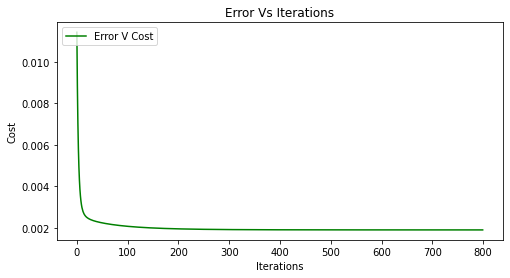

In [ ]:
fig,ax = plt.subplots(figsize=(8,4))
ax.plot(np.arange(iters),cost,'g',label="Error V Cost")
ax.legend(loc=2)
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error Vs Iterations')

In [ ]:
from sklearn.metrics import mean_absolute_error

Error = mean_absolute_error(model_price,y)
Accuracy = 1 - Error

print('Error = {} %'.format((round(Error*100,2))))
print('Accuracy = {} %'.format((round(Accuracy*100,2))))

Error = 4.95 %
Accuracy = 95.05 %


In [ ]:
test_raw_data = pd.read_csv(path+'Chennai_house_multivariate_test.csv')

In [ ]:
test_raw_data.head()

,AreaCode,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,OTHER_ROOMS,PARK_FACILITY,BUILDINGTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,REG_FEE,COMMIS,SALES_PRICE
0,5,2497,197,4,2,0,1,3,1,1,5,2.0,2.4,4.7,445401,301723,14367780
1,4,1265,55,1,1,1,0,2,3,0,5,3.8,3.0,3.3,242471,103916,6927750
2,2,1769,28,1,1,2,1,3,2,1,6,3.8,3.7,2.1,418558,294541,15502160
3,6,1902,21,2,1,2,1,3,3,0,4,4.5,2.2,3.6,427193,124024,13780420
4,5,1895,63,3,2,0,0,1,3,1,6,3.5,3.1,4.8,551971,340923,16234440


In [ ]:
test_raw_data.shape

(1104, 17)

In [ ]:
test_data= (test_raw_data-raw_data.mean())/(raw_data.max()-raw_data.min())  # Data preprocessing
test_data.head()

,AreaCode,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,OTHER_ROOMS,PARK_FACILITY,BUILDINGTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,REG_FEE,COMMIS,SALES_PRICE
0,0.184670,0.557984,0.487498,0.788687,0.785464,-0.418736,0.492415,0.500667,-0.624771,-0.041757,0.138423,-0.509485,-0.367967,0.406523,0.074603,0.328128,0.161522
1,0.018003,-0.058324,-0.222502,-0.211313,-0.214536,0.081264,-0.507585,0.000667,0.375229,-0.541757,0.138423,0.090515,-0.167967,-0.060143,-0.147727,-0.075272,-0.184357
2,-0.315330,0.193802,-0.357502,-0.211313,-0.214536,0.581264,0.492415,0.500667,-0.124771,-0.041757,0.338423,0.090515,0.065366,-0.460143,0.045194,0.313481,0.214258
3,0.351336,0.260335,-0.392502,0.122020,-0.214536,0.581264,0.492415,0.500667,0.375229,-0.541757,-0.061577,0.323848,-0.434634,0.039857,0.054654,-0.034264,0.134216
4,0.184670,0.256834,-0.182502,0.455354,0.785464,-0.418736,-0.507585,-0.499333,0.375229,-0.041757,0.338423,-0.009485,-0.134634,0.439857,0.191360,0.408071,0.248301


In [ ]:
test_data.insert(0,'ones',1)
test_data.head()

,ones,AreaCode,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,OTHER_ROOMS,PARK_FACILITY,BUILDINGTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,REG_FEE,COMMIS,SALES_PRICE
0,1,0.184670,0.557984,0.487498,0.788687,0.785464,-0.418736,0.492415,0.500667,-0.624771,-0.041757,0.138423,-0.509485,-0.367967,0.406523,0.074603,0.328128,0.161522
1,1,0.018003,-0.058324,-0.222502,-0.211313,-0.214536,0.081264,-0.507585,0.000667,0.375229,-0.541757,0.138423,0.090515,-0.167967,-0.060143,-0.147727,-0.075272,-0.184357
2,1,-0.315330,0.193802,-0.357502,-0.211313,-0.214536,0.581264,0.492415,0.500667,-0.124771,-0.041757,0.338423,0.090515,0.065366,-0.460143,0.045194,0.313481,0.214258
3,1,0.351336,0.260335,-0.392502,0.122020,-0.214536,0.581264,0.492415,0.500667,0.375229,-0.541757,-0.061577,0.323848,-0.434634,0.039857,0.054654,-0.034264,0.134216
4,1,0.184670,0.256834,-0.182502,0.455354,0.785464,-0.418736,-0.507585,-0.499333,0.375229,-0.041757,0.338423,-0.009485,-0.134634,0.439857,0.191360,0.408071,0.248301


In [ ]:
cols = test_data.shape[1]
# seperating X from the data
x = test_data.iloc[:,0:cols-1]

# seperating Y from the data
y= test_data.iloc[:,cols-1:cols]

In [ ]:
x = np.matrix(x)
y = np.matrix(y)

In [ ]:
x.shape, y.shape

((1104, 17), (1104, 1))

In [ ]:
ComputeError(x,y,theta)

0.016256257242365922

In [ ]:
print(cost)

[0.011417816438369545, 0.008840144895958992, 0.00705888363465441, 0.005815733219260566, 0.004939544365391437, 0.0043157120466777, 0.003866792413293038, 0.0035400324204973286, 0.003299237796566437, 0.0031194088900841303, 0.0029831677056638153, 0.002878358203994334, 0.0027964230417466145, 0.002731298630681489, 0.0026786587813179036, 0.0026353942851988343, 0.0025992530913627396, 0.0025685903448864227, 0.0025421939299674796, 0.002519162130971418, 0.0024988174198321334, 0.002480645388920638, 0.0024642512594253373, 0.0024493287268785827, 0.00243563750537575, 0.002422987033838184, 0.0024112245690808983, 0.0024002264184142244, 0.0023898914318511368, 0.002380136130457681, 0.0023708910270733236, 0.0023620978219878364, 0.0023537072453607977, 0.002345677381392066, 0.0023379723542537663, 0.0023305612879726766, 0.0023234174755717633, 0.0023165177094761425, 0.002309841737312237, 0.002303371816082795, 0.0022970923442059837, 0.0022909895557177507, 0.002285051264518544, 0.002279266649231161, 0.002273626

In [ ]:
model_price = x * new_theta.T

Text(0.5, 1.0, 'Error Vs Iterations')

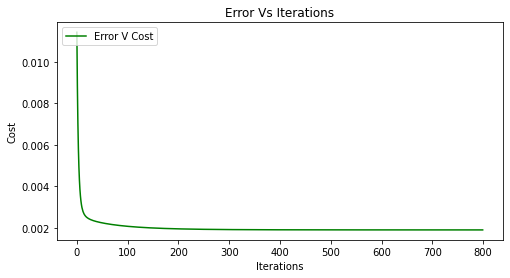

In [ ]:
fig,ax = plt.subplots(figsize=(8,4))
ax.plot(np.arange(iters),cost,'g',label="Error V Cost")
ax.legend(loc=2)
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error Vs Iterations')

In [ ]:
from sklearn.metrics import mean_absolute_error

Error = mean_absolute_error(model_price,y)
Accuracy = 1 - Error

print('Error = {} %'.format((round(Error*100,2))))
print('Accuracy = {} %'.format((round(Accuracy*100,2))))

Error = 4.72 %
Accuracy = 95.28 %
